# Web Scraping to Gain Company Insights
The first thing to do will be to scrape review data from the web. For this, you should use a website called Skytrax.

The team leader wants you to focus on reviews specifically about the airline itself. You should collect as much data as you can in order to improve the output of your analysis. To get started with the data collection, you can use the “Jupyter Notebook” in the Resources section below to run some Python code that will help to collect some data.

Analyse data Once you have your dataset, you need to prepare it. The data will be very messy and contain purely text. You will need to perform data cleaning in order to prepare the data for analysis. When the data is clean, you should perform your own analysis to uncover some insights. As a starting point, you could look at topic modelling, sentiment analysis or wordclouds to provide some insight into the content of the reviews. It is recommended to complete this task using Python, however, you can use any tool that you wish. You can use some of the documentation websites provided in the Resources section below to analyse the data.

Please ensure that you have created a folder called "data" and mapped your file path.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
%matplotlib inline

from pprint import pprint

C:\Users\Huang\.conda\envs\ADS2022\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [68]:
import plotly.express as px

In [2]:
df = pd.read_csv("../data/airline_reviews/british-airways.csv")
df.tail()

,header,rating,review_date,comment,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,wifi_and_connecticity,recommend,wifi_and_connectivity
1195,"""nice flight with good cabin service""",9,2017-09-11,✅ Verified Review | London Heathrow to Biarri...,False,A319,Couple Leisure,Economy Class,London Heathrow to Biarritz,September 2017,4.0,5.0,NaN,4.0,4,NaN,True,NaN
1196,"""they are just an embarrassment""",2,2017-09-11,✅ Verified Review | London Gatwick to Funchal...,False,A320,Couple Leisure,Economy Class,London Gatwick to Funchal,September 2017,1.0,1.0,NaN,2.0,1,NaN,False,NaN
1197,"""very good flight again""",8,2017-09-09,✅ Verified Review | Zakinthos to London Heath...,False,A320,Family Leisure,Business Class,Zakinthos to London Heathrow,September 2017,4.0,5.0,"<span class=""star fill"">2</span>",2.0,5,NaN,True,NaN
1198,"""expensive at £343 return""",8,2017-09-09,✅ Verified Review | Flew British Airways from...,False,A319,Business,Economy Class,Belfast City to London Heathrow,September 2017,3.0,4.0,NaN,5.0,2,NaN,True,NaN
1199,"""staff were extremely friendly""",8,2017-09-09,✅ Verified Review | Toronto to London Heathro...,False,Boeing 777-200,Business,Business Class,Toronto to London Heathrow,September 2017,4.0,5.0,NaN,4.0,4,NaN,True,NaN


In [3]:
df.header = df.header.str.replace("\"", "").str.strip()

In [4]:
df.comment = df.comment.str.replace("✅ Verified Review |", "")
df.comment = df.comment.str.replace("Not Verified |", "")
df.comment = df.comment.str.replace("|", "")

C:\Users\Huang\AppData\Local\Temp\ipykernel_43384\1627770123.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.comment = df.comment.str.replace("✅ Verified Review |", "")
C:\Users\Huang\AppData\Local\Temp\ipykernel_43384\1627770123.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.comment = df.comment.str.replace("Not Verified |", "")
C:\Users\Huang\AppData\Local\Temp\ipykernel_43384\1627770123.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.comment = df.comment.str.replace("|", "")


In [5]:
def extract_number(x):
    res = re.search(r"\d", str(x))
    if res:
        return res.group()
    else:
        return np.nan

In [6]:
df.food_and_beverages = df.food_and_beverages.apply(lambda x: extract_number(x))

In [7]:
df[['seat_comfort', 'cabin_staff_service', 'food_and_beverages',
       'ground_service', 'value_for_money', 'wifi_and_connecticity', 'wifi_and_connectivity']].sum()

C:\Users\Huang\AppData\Local\Temp\ipykernel_43384\451296753.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'ground_service', 'value_for_money', 'wifi_and_connecticity', 'wifi_and_connectivity']].sum()


seat_comfort             3127.0
cabin_staff_service      3552.0
ground_service           3191.0
value_for_money          3037.0
wifi_and_connecticity       0.0
wifi_and_connectivity     617.0
dtype: float64

In [10]:
df.header[0]

'Will honestly never fly them again if I can help it'

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [46]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [58]:
df

,header,rating,review_date,comment,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,wifi_and_connecticity,recommend,wifi_and_connectivity,comment_sentiment
0,Will honestly never fly them again if I can he...,4,2022-11-19,Flew from Amman to London on Nov. 14 2022. Not...,True,NaN,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),November 2022,3.0,2.0,NaN,4.0,2,NaN,False,NaN,neu
1,Very unprofessional for a renowned airline lik...,1,2022-11-19,This is the worst experience I have ever had w...,True,NaN,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,August 2022,1.0,1.0,1,1.0,1,NaN,False,1.0,neu
2,lounge was overcrowded and worn out,2,2022-11-18,Flying LHR T5 to CPT November 2022: BA app an...,True,Boeing 777,Solo Leisure,Business Class,London to Cape Town,November 2022,4.0,2.0,4,1.0,1,NaN,False,NaN,neu
3,very uncomfortable trip,1,2022-11-07,Worst experience ever. Outbound flight was ca...,False,NaN,Solo Leisure,Economy Class,Milan to Dallas via London,November 2022,2.0,5.0,2,2.0,1,NaN,False,2.0,neu
4,rate this just as a mediocre journey,5,2022-11-07,"Check in was a shambles at BWI, just 3 counter...",True,Boeing 787-8,Solo Leisure,Economy Class,Baltimore to London Heathrow,November 2022,1.0,3.0,1,2.0,3,NaN,True,NaN,neu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,nice flight with good cabin service,9,2017-09-11,London Heathrow to Biarritz. Had a very nice...,False,A319,Couple Leisure,Economy Class,London Heathrow to Biarritz,September 2017,4.0,5.0,NaN,4.0,4,NaN,True,NaN,neu
1196,they are just an embarrassment,2,2017-09-11,London Gatwick to Funchal. In my opinion Bri...,False,A320,Couple Leisure,Economy Class,London Gatwick to Funchal,September 2017,1.0,1.0,NaN,2.0,1,NaN,False,NaN,neu
1197,very good flight again,8,2017-09-09,Zakinthos to London Heathrow. Poor check in ...,False,A320,Family Leisure,Business Class,Zakinthos to London Heathrow,September 2017,4.0,5.0,2,2.0,5,NaN,True,NaN,neu
1198,expensive at £343 return,8,2017-09-09,Flew British Airways from Belfast City to Lo...,False,A319,Business,Economy Class,Belfast City to London Heathrow,September 2017,3.0,4.0,NaN,5.0,2,NaN,True,NaN,neu


In [48]:
df

,header,rating,review_date,comment,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,wifi_and_connecticity,recommend,wifi_and_connectivity,comment_sentiment
0,Will honestly never fly them again if I can he...,4,2022-11-19,Flew from Amman to London on Nov. 14 2022. Not...,True,NaN,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),November 2022,3.0,2.0,NaN,4.0,2,NaN,False,NaN,neu
1,Very unprofessional for a renowned airline lik...,1,2022-11-19,This is the worst experience I have ever had w...,True,NaN,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,August 2022,1.0,1.0,1,1.0,1,NaN,False,1.0,neu
2,lounge was overcrowded and worn out,2,2022-11-18,Flying LHR T5 to CPT November 2022: BA app an...,True,Boeing 777,Solo Leisure,Business Class,London to Cape Town,November 2022,4.0,2.0,4,1.0,1,NaN,False,NaN,neu
3,very uncomfortable trip,1,2022-11-07,Worst experience ever. Outbound flight was ca...,False,NaN,Solo Leisure,Economy Class,Milan to Dallas via London,November 2022,2.0,5.0,2,2.0,1,NaN,False,2.0,neu
4,rate this just as a mediocre journey,5,2022-11-07,"Check in was a shambles at BWI, just 3 counter...",True,Boeing 787-8,Solo Leisure,Economy Class,Baltimore to London Heathrow,November 2022,1.0,3.0,1,2.0,3,NaN,True,NaN,neu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,nice flight with good cabin service,9,2017-09-11,London Heathrow to Biarritz. Had a very nice...,False,A319,Couple Leisure,Economy Class,London Heathrow to Biarritz,September 2017,4.0,5.0,NaN,4.0,4,NaN,True,NaN,neu
1196,they are just an embarrassment,2,2017-09-11,London Gatwick to Funchal. In my opinion Bri...,False,A320,Couple Leisure,Economy Class,London Gatwick to Funchal,September 2017,1.0,1.0,NaN,2.0,1,NaN,False,NaN,neu
1197,very good flight again,8,2017-09-09,Zakinthos to London Heathrow. Poor check in ...,False,A320,Family Leisure,Business Class,Zakinthos to London Heathrow,September 2017,4.0,5.0,2,2.0,5,NaN,True,NaN,neu
1198,expensive at £343 return,8,2017-09-09,Flew British Airways from Belfast City to Lo...,False,A319,Business,Economy Class,Belfast City to London Heathrow,September 2017,3.0,4.0,NaN,5.0,2,NaN,True,NaN,neu


In [119]:
df.food_and_beverages = df.food_and_beverages.astype('Int8')

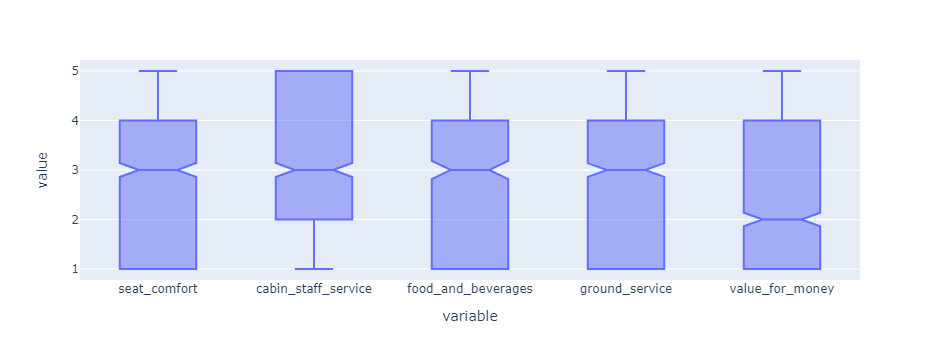

In [126]:
px.box(df, y=['seat_comfort', 'cabin_staff_service', 'food_and_beverages', 'ground_service', 'value_for_money'],
       notched=True)

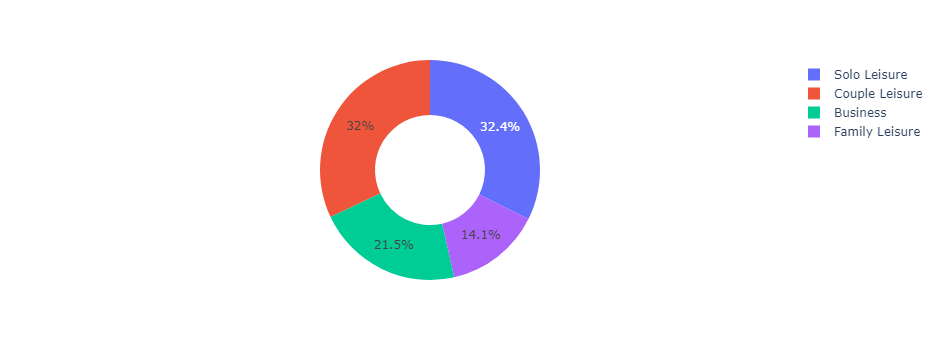

In [103]:
px.pie(data_frame=df[['type_of_traveller', 'rating']].groupby('type_of_traveller').count().reset_index(),
       names='type_of_traveller',
       values='rating',
       hole=0.5)

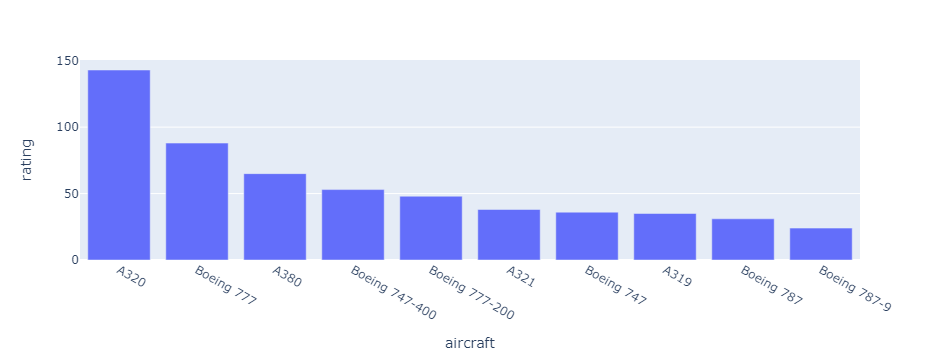

In [97]:
px.bar(data_frame=df[['aircraft', 'rating']].groupby('aircraft').count().sort_values(by='rating', ascending=False).head(10).reset_index(),
       x='aircraft',
       y='rating')

In [89]:
df[['seat_type', 'rating']].groupby('seat_type').count().reset_index()

,seat_type,rating
0,Business Class,394
1,Economy Class,651
2,First Class,53
3,Premium Economy,102


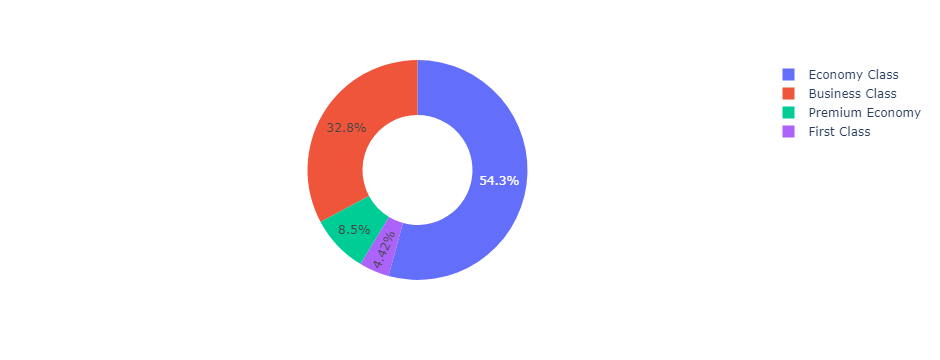

In [90]:
px.pie(data_frame=df[['seat_type', 'rating']].groupby('seat_type').count().reset_index(), values='rating', names='seat_type', hole=0.5)

,rating,comment
0,1,352
1,2,144
2,3,126
3,4,70
4,5,68
5,6,53
6,7,86
7,8,103
8,9,85
9,10,113


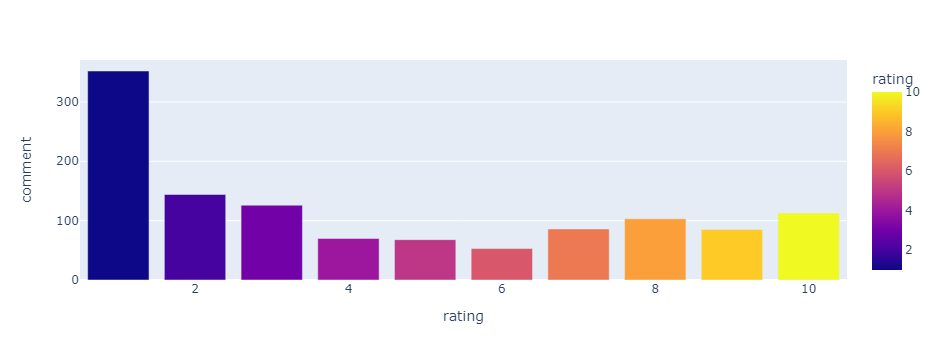

In [134]:
px.bar(data_frame=df[['rating', 'comment']].groupby('rating').count().reset_index(), 
       x='rating',
       y='comment',
       color='rating')

In [136]:
df['sentiment'] = df.agg(lambda x: sentiment_pipeline(x.comment[:500])[0]['label'], axis=1)

In [138]:
df1 = df[['sentiment', 'rating']].groupby('sentiment').count().reset_index()
df1

,sentiment,rating
0,NEGATIVE,866
1,POSITIVE,334


In [140]:
df1.rating = df1.rating / df1.rating.sum()

In [141]:
df1

,sentiment,rating
0,NEGATIVE,0.721667
1,POSITIVE,0.278333


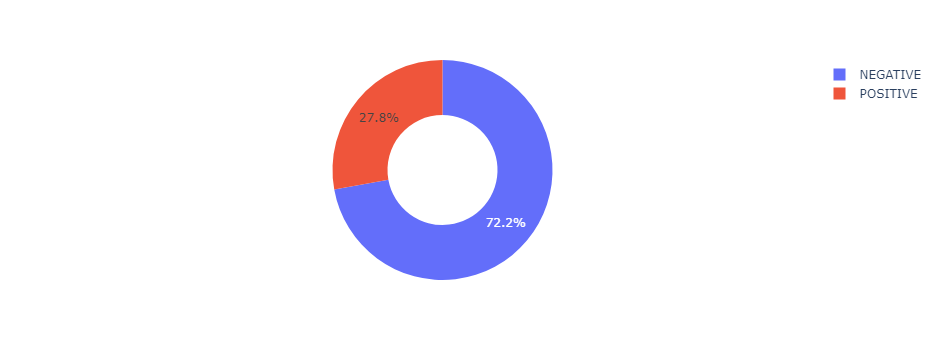

In [144]:
px.pie(data_frame=df1, values='rating', names='sentiment', hole=0.5)